# EXPLOITATION OF BRACHIAL BLOOD PRESSURE WAVEFORM
Extraction of features from the brachial waveform to predict Ees using regression 

In [12]:
# Useful starting lines
%matplotlib inline
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import scipy as ski
import matplotlib.pyplot as plt
import sklearn
from scripts.helpers import *
from scripts.BrachialWaveform_Helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

- U1 data is the one used in the control group. #no Ejection Fraction (EF)

- br_waveform is the brachial waveform

- Ees is the true value for the prediction 



In [13]:
#Create path names
BWF_PATH = "../Data/brachial_BP_waveforms_HEMODB.csv"
U1_PATH = "../Data/u1.csv"
EES_PATH = "../Data/true_ees.csv"

In [14]:
br_waveform = pd.read_csv(BWF_PATH, sep=';').set_index("ID")
br_waveform = br_waveform.loc[:, (br_waveform != 0).any(axis=0)] #drop all-0 columns

u1_data = pd.read_csv(U1_PATH).set_index("ID")
ees = pd.read_csv(EES_PATH).set_index("ID")

In [15]:
# The ees value in the csv file is inversed
ees = inverse(ees)

In [16]:
#Create comparative table with values 

control_results = pd.DataFrame(columns=['r','R2','RMSE','MAE'],index=['All', 'Hypertense', 'Normal'])
Group1_results = pd.DataFrame(columns=['r','R2','RMSE','MAE'],index=['All', 'Hypertense', 'Normal'])
Group2_results = pd.DataFrame(columns=['r','R2','RMSE','MAE'],index=['All', 'Hypertense', 'Normal'])
Group3_results = pd.DataFrame(columns=['r','R2','RMSE','MAE'],index=['All', 'Hypertense', 'Normal'])

## Brachial Waveform Analysis with plots
- Plot an example of the brachial waveform with its derivative

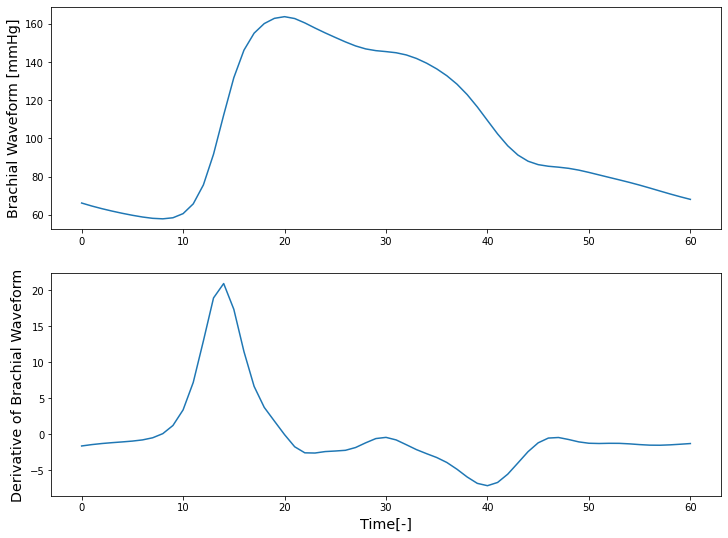

In [22]:
from scipy import interpolate


wv = br_waveform.to_numpy()

plt.figure(figsize=[12,9])
wv_pos = wv[4000,wv[4000,:]>0]
x_axis = range(wv_pos.shape[0])

plt.subplot(211)
f = ski.interpolate.CubicSpline(x_axis,wv_pos)
f_plot = f(range(wv_pos.shape[0]))
plt.plot(f_plot, color='tab:blue')
plt.ylabel('Brachial Waveform [mmHg]', fontsize='x-large')

plt.subplot(212)
f_dif = ski.interpolate.CubicSpline.derivative(f)
f_dif_plot = f_dif(range(wv_pos.shape[0]))
plt.plot(f_dif_plot, color='tab:blue')
plt.ylabel('Derivative of Brachial Waveform', fontsize='x-large')
plt.xlabel('Time[-]', fontsize='x-large')

plt.savefig('Brachial Waveform example')
plt.show()

# Implementing regression in different groups of features

## CONTROL
Using the follwing features: brSBP - brDBP - cfPWV - HR

In [23]:
# Data from u1_data file and normalize it
u1_data.head()

,brSBP,brDBP,HR,cfPWV
ID,,,,
1,98.328,73.229,85.608000,6.2060
2,87.134,64.596,74.166000,5.8806
3,85.728,65.301,86.010000,6.0619
4,87.308,68.627,82.570492,5.9547
5,83.572,65.532,97.197000,5.7352


In [25]:
#Run Gradient Boosting for all data in Control
control_results.at['All','r'], control_results.at['All','R2'], control_results.at['All','RMSE'], control_results.at['All','MAE'],_ = GradBoost(u1_data,ees,0.001,1750)

i:0, r:0.3484409167094995, R2:0.10782462050584685, RMSE:0.07566617834229566, MAE:0.05657257678234229
i:1, r:0.3233192850343373, R2:0.10050033801389302, RMSE:0.08280460896998432, MAE:0.06549224714361652
i:2, r:0.2838261982646274, R2:0.07079973998641875, RMSE:0.07705563155009709, MAE:0.06003160634939927
i:3, r:0.29790488095303996, R2:0.08690652684028255, RMSE:0.08017816408425775, MAE:0.06241898385106428
i:4, r:0.32647267098070065, R2:0.10585022713049141, RMSE:0.08182818957929783, MAE:0.06120309760896488
i:5, r:0.4720577842537691, R2:0.17704875997456493, RMSE:0.08205355291673519, MAE:0.06275078192481082
i:6, r:0.3604072298882117, R2:0.12622968939040347, RMSE:0.07984878211617313, MAE:0.061044893794663053
i:7, r:0.4292127884893956, R2:0.16922432781766272, RMSE:0.07793206543501513, MAE:0.0598274509482413
i:8, r:0.25706401489856995, R2:0.05802283786326068, RMSE:0.09244683139342012, MAE:0.06886081704499644
i:9, r:0.39292223599657733, R2:0.139559280104394, RMSE:0.08263146745790535, MAE:0.064487

In [26]:
#Split Control data according to pressure between hypertense and normal
_,_,_,_,data_hypertense_ctrl,data_normal_ctrl,ees_hypertense_ctrl,ees_normal_ctrl=split_pressure(br_waveform,ees,u1_data)
print(data_hypertense_ctrl.shape, data_normal_ctrl.shape)

(1171, 4) (2847, 4)


In [27]:
#Run Gradient Boosting for Control Hypertense
_,_,_,_,data_hypertense_ctrl,data_normal_ctrl,ees_hypertense_ctrl,ees_normal_ctrl=split_pressure(br_waveform,ees,u1_data)
control_results.at['Hypertense','r'], control_results.at['Hypertense','R2'],control_results.at['Hypertense','RMSE'],control_results.at['Hypertense','MAE'],_ = GradBoost(data_hypertense_ctrl,ees_hypertense_ctrl,0.001,1750)

i:0, r:0.19467229282122636, R2:0.0343873096453331, RMSE:0.06359123357029714, MAE:0.04906947743994253
i:1, r:0.10884768879612826, R2:-0.016562467845840034, RMSE:0.06806030704614204, MAE:0.05359385177894577
i:2, r:0.21353965657911225, R2:0.0027772582953343727, RMSE:0.0716240819130633, MAE:0.057933061196213324
i:3, r:0.1136901272147665, R2:-0.016072050469590593, RMSE:0.06367088937773104, MAE:0.05048788305206496
i:4, r:0.21501838082030578, R2:0.044446131825421675, RMSE:0.08251786781207376, MAE:0.05405746498256325
i:5, r:0.20875229014296962, R2:0.04282332526266919, RMSE:0.05652912288925474, MAE:0.047619999300299545
i:6, r:0.2114232651504233, R2:-0.05242723123949533, RMSE:0.06336873551809442, MAE:0.05153900019208161
i:7, r:0.10366767901174488, R2:-0.011453401427097054, RMSE:0.06161966989336488, MAE:0.04997040904627652
i:8, r:0.1773478442065709, R2:0.01829391124260671, RMSE:0.05871768837279207, MAE:0.045802921056102036
i:9, r:0.15926649684783378, R2:-0.0008403131472518588, RMSE:0.067191216643

In [28]:
#Run Gradient Boosting for Control Normal
control_results.at['Normal','r'], control_results.at['Normal','R2'],control_results.at['Normal','RMSE'],control_results.at['Normal','MAE'], _ = GradBoost(data_normal_ctrl,ees_normal_ctrl,0.001,1750)

i:0, r:0.31433551655110487, R2:0.09595627839088017, RMSE:0.08346681027456576, MAE:0.06587066241534334
i:1, r:0.17758173021563078, R2:0.0178688855517255, RMSE:0.08757680303155647, MAE:0.06641192632578136
i:2, r:0.34718324664615846, R2:0.11716500392937068, RMSE:0.08379651569455777, MAE:0.06703081178785578
i:3, r:0.33429564891560626, R2:0.10730483573608018, RMSE:0.08905787101192827, MAE:0.06858972612073355
i:4, r:0.39212076266477175, R2:0.14366400999716966, RMSE:0.08101444670397809, MAE:0.06041919147959933
i:5, r:0.30112047883691867, R2:0.08961566563699686, RMSE:0.08033795991622993, MAE:0.06436184151261348
i:6, r:0.2739022261223175, R2:0.07486521754382824, RMSE:0.09226247496203134, MAE:0.06954246124114878
i:7, r:0.35237135935301417, R2:0.10960904843772445, RMSE:0.08844737133617418, MAE:0.06981037386408002
i:8, r:0.25379251706844014, R2:0.06382367282235613, RMSE:0.0956881372766147, MAE:0.07340582911100248
i:9, r:0.3343449302775144, R2:0.10975289563883117, RMSE:0.08011684071975236, MAE:0.06

In [34]:
control_results

,r,R2,RMSE,MAE
All,0.392949,0.143893,0.078832,0.0610177
Hypertense,0.180747,0.0249931,0.068126,0.0529738
Normal,0.370297,0.127644,0.0860289,0.0659117


## GROUP 1
brSBP = maximum value\
brDBP = minimum value\
brPP = brSBP-brDBP\
MAP = Mean value\
Heart rate





In [29]:
#construct group 1 data 
data = extract_features(br_waveform, u1_data['HR'])
data.head()

,brSBP,brDBP,brPP,MAP,HR
ID,,,,,
1,97.921147,72.501041,25.420106,71.242528,85.608000
2,86.991609,63.947298,23.044311,62.120811,74.166000
3,85.470160,64.423015,21.047145,62.120418,86.010000
4,86.779775,67.809514,18.970261,55.254148,82.570492
5,82.809095,64.708016,18.101079,55.336563,97.197000


In [30]:
#Run Gradient Boosting for Group 1 All data
Group1_results.at['All','r'], Group1_results.at['All','R2'],Group1_results.at['All','RMSE'],Group1_results.at['All','MAE'], y_g1 =GradBoost(data,ees, learning_rate = 0.001, n_estimators= 1750)

i:0, r:0.431754065252797, R2:0.16218840164371784, RMSE:0.0798663560411872, MAE:0.06052252323001293
i:1, r:0.4545238117953778, R2:0.1705788831780014, RMSE:0.08440101607457265, MAE:0.0631077392372598
i:2, r:0.3954723408397231, R2:0.13583257996717135, RMSE:0.09054195379526331, MAE:0.06543274917638202
i:3, r:0.28229169615568167, R2:0.07870988297139381, RMSE:0.08152267888222049, MAE:0.06530729633144818
i:4, r:0.30634895214404656, R2:0.08432599250558204, RMSE:0.07853263408509724, MAE:0.06093256443898211
i:5, r:0.36791706671946944, R2:0.12926403115518392, RMSE:0.073161285612034, MAE:0.05804047456092334
i:6, r:0.4291473980096991, R2:0.16918663823388513, RMSE:0.0730538607331634, MAE:0.05732110540425837
i:7, r:0.3295787069281767, R2:0.106024697812934, RMSE:0.0814374556353723, MAE:0.06399049411802028
i:8, r:0.3859318655097795, R2:0.1428702406194815, RMSE:0.08002817897051612, MAE:0.05952619744440933
i:9, r:0.37451680247870595, R2:0.13381373859782209, RMSE:0.07859727264582105, MAE:0.058099618098722

In [31]:
#split group 1 data accorind to pressure, hypertense and normal 
idx_hypertenseSBP_g1,idx_hypertenseDBP_g1,wv_hypertense_g1,wv_normal_g1,data_hypertense_g1,data_normal_g1,ees_hypertense_g1,ees_normal_g1=split_pressure(br_waveform,ees,data)
print(data_hypertense_g1.shape, data_normal_g1.shape)

(1171, 5) (2847, 5)


In [32]:
#Run Gradient Boosting for Group 1 Hypertense 
Group1_results.at['Hypertense','r'], Group1_results.at['Hypertense','R2'],Group1_results.at['Hypertense','RMSE'],Group1_results.at['Hypertense','MAE'], _ = GradBoost(data_hypertense_g1,ees_hypertense_g1, 0.001, 1750)

i:0, r:0.29286184985757, R2:0.07318280235777108, RMSE:0.06751000764638948, MAE:0.052105395280043536
i:1, r:0.21098004235318768, R2:0.04088718635951727, RMSE:0.06077726627438696, MAE:0.04625749287850738
i:2, r:0.22652287366407003, R2:0.03481242966862841, RMSE:0.061115778652755484, MAE:0.05013011880879503
i:3, r:0.1803084540249073, R2:0.029123724609955715, RMSE:0.0622100294409621, MAE:0.04937080028147725
i:4, r:0.1604951548810504, R2:-0.014814770058501958, RMSE:0.08397026234140693, MAE:0.055335300215719134
i:5, r:0.24142425998381678, R2:0.05745229642430749, RMSE:0.06268548225510284, MAE:0.048128167532433395
i:6, r:-0.06279377989860978, R2:-0.3225210068217592, RMSE:0.07268961844769635, MAE:0.05587128132991047
i:7, r:0.1710740521112952, R2:-0.004083228342091072, RMSE:0.0616856094565551, MAE:0.04989637516471547
i:8, r:0.13204930549493296, R2:0.01223896152382764, RMSE:0.06370019365012855, MAE:0.048330342998913235
i:9, r:0.23828770435634317, R2:0.05025380146331315, RMSE:0.06646043392401833, M

In [48]:
#Run Gradient Boosting for Group 1 Normal
Group1_results.at['Normal','r'], Group1_results.at['Normal','R2'],Group1_results.at['Normal','RMSE'],Group1_results.at['Normal','MAE'], y_pred_normal_1=GradBoost(data_normal_g1,ees_normal_g1, 0.001, 1750)

i:0, r:0.37177150639367434, R2:0.11369837126167803, RMSE:0.09646633808986481, MAE:0.07216347978901959
i:1, r:0.3292451514830002, R2:0.0923469193546127, RMSE:0.07861871208612681, MAE:0.06318872992775662
i:2, r:0.36522409167240566, R2:0.127491934914707, RMSE:0.07959716498871162, MAE:0.0650902118428572
i:3, r:0.2705034938230341, R2:0.0710845821300845, RMSE:0.090767542105651, MAE:0.07023790488074845
i:4, r:0.36701802409849216, R2:0.1294981471549307, RMSE:0.08449356221882358, MAE:0.06740773922193674
i:5, r:0.2602852888663625, R2:0.055056266808277576, RMSE:0.09150911689602893, MAE:0.0659549486822245
i:6, r:0.34902084518081145, R2:0.1174679981820449, RMSE:0.08509340420365614, MAE:0.06779374634011258
i:7, r:0.4420428574403159, R2:0.17410117024802174, RMSE:0.0815189440902131, MAE:0.06297553209700153
i:8, r:0.3310988564755169, R2:0.10238933851503096, RMSE:0.09328548361385584, MAE:0.06966984758708637
i:9, r:0.31940276746722596, R2:0.1018383683342895, RMSE:0.08317678384922947, MAE:0.06179825932828

In [49]:
Group1_results

,r,R2,RMSE,MAE
All,0.374272,0.135583,0.080464,0.0626636
Hypertense,0.170452,0.00816036,0.0675084,0.0531133
Normal,0.350392,0.119982,0.0811478,0.0636482


# GROUP 2
Group 1 features\
Peak of derivative (dPdtmax)\
Minimum of derivative (dP/dt min)\
Time at peak of derivative\
Time at minimum of derivative

In [36]:
#Construct group 2 dataset
data = extract_features(br_waveform, u1_data['HR'], derivative = True)
data.head()

,brSBP,brDBP,brPP,MAP,HR,peak der,minimum derivative,time at peak der,time at minimum der
ID,,,,,,,,,
1,97.921147,72.501041,25.420106,71.242528,85.608000,3.325604,-1.703162,26.0,45.0
2,86.991609,63.947298,23.044311,62.120811,74.166000,3.252211,-1.719131,23.0,40.0
3,85.470160,64.423015,21.047145,62.120418,86.010000,2.504967,-1.472528,29.0,48.0
4,86.779775,67.809514,18.970261,55.254148,82.570492,2.620679,-1.523885,25.0,41.0
5,82.809095,64.708016,18.101079,55.336563,97.197000,1.981080,-1.010807,31.0,52.0


In [37]:
#Run Gradient Boosting for All data in Group 2
Group2_results.at['All','r'], Group2_results.at['All','R2'],Group2_results.at['All','RMSE'],Group2_results.at['All','MAE'], y_g2 =GradBoost(data,ees, 0.05, 1750)

i:0, r:0.8873549900936691, R2:0.786979391839704, RMSE:0.035431643089128814, MAE:0.02642936347402436
i:1, r:0.9026126748395716, R2:0.8075853105087667, RMSE:0.03711267367380482, MAE:0.027375364823496014
i:2, r:0.9119379912803782, R2:0.8220119138242694, RMSE:0.03640388152821003, MAE:0.0272491193674537
i:3, r:0.8969926472236222, R2:0.8014015339050055, RMSE:0.03607754287722811, MAE:0.026678712117923956
i:4, r:0.8912597433732633, R2:0.7857796185824262, RMSE:0.040411989275167724, MAE:0.028844442119564342
i:5, r:0.8980134637597784, R2:0.794991735249891, RMSE:0.039173152909886905, MAE:0.028006776626942727
i:6, r:0.8827843086734151, R2:0.7660992604309138, RMSE:0.04457678615720052, MAE:0.02927228282175314
i:7, r:0.895033678844091, R2:0.7914474186711804, RMSE:0.04084325577181513, MAE:0.028990740469547367
i:8, r:0.8803137234654395, R2:0.7700959872612917, RMSE:0.03933382366285298, MAE:0.028700695235135864
i:9, r:0.8806305839297843, R2:0.7733542323875429, RMSE:0.03899310494073288, MAE:0.0286778052205

In [38]:
#Split Group 3 data according to pressure, hypertense and normal 
idx_hypertenseSBP_g3,idx_hypertenseDBP_g3,wv_hypertense_g3,wv_normal_g3,data_hypertense_g3,data_normal_g3,ees_hypertense_g3,ees_normal_g3=split_pressure(br_waveform,ees, data)
print(data_hypertense_g3.shape, data_normal_g3.shape)

(1171, 9) (2847, 9)


In [39]:
#Run Gradient Boosting for Hypertense in Group 2
Group2_results.at['Hypertense','r'], Group2_results.at['Hypertense','R2'],Group2_results.at['Hypertense','RMSE'],Group2_results.at['Hypertense','MAE'], y_pred_hypertense_2=GradBoost(data_hypertense_g3,ees_hypertense_g3, 0.05, 1750)

i:0, r:0.9404024569166085, R2:0.8726889556010979, RMSE:0.020622702853754584, MAE:0.01650990158588464
i:1, r:0.9313074989025446, R2:0.8576529254058585, RMSE:0.02491452493657853, MAE:0.01902027744287973
i:2, r:0.9361884983242461, R2:0.858388014330402, RMSE:0.02586680992030653, MAE:0.019455015380680455
i:3, r:0.9119094732108152, R2:0.8241557324583659, RMSE:0.02793239864759642, MAE:0.020697626735867062
i:4, r:0.9319224050206489, R2:0.852303540642652, RMSE:0.02709542603702554, MAE:0.020189913089936878
i:5, r:0.9386108758528053, R2:0.8659944944000457, RMSE:0.024816067568062705, MAE:0.01939804774060125
i:6, r:0.8657450680478905, R2:0.74514455152629, RMSE:0.025432397391484375, MAE:0.019643064687523273
i:7, r:0.9395958268370109, R2:0.8741623327517282, RMSE:0.022607500882499677, MAE:0.015151143557573134
i:8, r:0.9340160613617075, R2:0.8710562838620556, RMSE:0.023801265790910724, MAE:0.01836796521045989
i:9, r:0.9515531659521103, R2:0.8820679869699669, RMSE:0.029426887090748036, MAE:0.01822369458

In [40]:
#Run Gradient Boosting for Normal in Group 2
Group2_results.at['Normal','r'], Group2_results.at['Normal','R2'],Group2_results.at['Normal','RMSE'],Group2_results.at['Normal','MAE'] , y_pred_normal_2= GradBoost(data_normal_g3,ees_normal_g3, 0.05, 1750)

i:0, r:0.854056129048095, R2:0.7293340705188044, RMSE:0.043412976185013545, MAE:0.03138193109570419
i:1, r:0.8808602363818756, R2:0.7571749172229558, RMSE:0.04776711910292876, MAE:0.03305890096863386
i:2, r:0.9011797906297107, R2:0.8062927798439472, RMSE:0.03785548210768428, MAE:0.028934614322791076
i:3, r:0.8708703742774554, R2:0.7496639076162526, RMSE:0.048418898964027714, MAE:0.034633749002685496
i:4, r:0.9092772304898925, R2:0.8109255338791418, RMSE:0.04102481654141018, MAE:0.031126983138055522
i:5, r:0.8939495646896577, R2:0.7868968170900803, RMSE:0.044914135658042954, MAE:0.03323436995221029
i:6, r:0.8926697544527654, R2:0.7901600606185419, RMSE:0.043043304823707065, MAE:0.030416373288880215
i:7, r:0.8845823383861482, R2:0.7777252183510627, RMSE:0.04187614341193413, MAE:0.03306132153060043
i:8, r:0.9080236952128108, R2:0.8149628914242356, RMSE:0.04150484157574441, MAE:0.030299525405955364
i:9, r:0.8779270891809999, R2:0.7640698200023051, RMSE:0.04434570721976429, MAE:0.0334190339

In [41]:
Group2_results

,r,R2,RMSE,MAE
All,0.903376,0.798044,0.0410821,0.0295801
Hypertense,0.923302,0.839927,0.0271035,0.0193377
Normal,0.89173,0.794023,0.0376928,0.0281224


# Group 3
Features from Group 2 + Total area

In [42]:
#Construct group 3 data
data = extract_features(br_waveform, u1_data['HR'], derivative=True, area=True)
data.head()

,brSBP,brDBP,brPP,MAP,HR,peak der,minimum derivative,time at peak der,time at minimum der,TotalArea
ID,,,,,,,,,,
1,97.921147,72.501041,25.420106,71.242528,85.608000,3.325604,-1.703162,26.0,45.0,1753.594178
2,86.991609,63.947298,23.044311,62.120811,74.166000,3.252211,-1.719131,23.0,40.0,1888.249279
3,85.470160,64.423015,21.047145,62.120418,86.010000,2.504967,-1.472528,29.0,48.0,2333.109903
4,86.779775,67.809514,18.970261,55.254148,82.570492,2.620679,-1.523885,25.0,41.0,2066.007553
5,82.809095,64.708016,18.101079,55.336563,97.197000,1.981080,-1.010807,31.0,52.0,716.243498


In [43]:
#Run Gradient Boosting for All data in Group 3
Group3_results.at['All','r'], Group3_results.at['All','R2'],Group3_results.at['All','RMSE'],Group3_results.at['All','MAE'], y_g3 =GradBoost(data,ees, 0.05, 2000)

i:0, r:0.8945599342543837, R2:0.7980000369019151, RMSE:0.0375419627877457, MAE:0.025430962453847787
i:1, r:0.9170087832066499, R2:0.8270714128072987, RMSE:0.03674915721093132, MAE:0.02630933167562231
i:2, r:0.8965879315213579, R2:0.8020272609254775, RMSE:0.03513413471727294, MAE:0.025742244781360668
i:3, r:0.9159416104936158, R2:0.8296307642939476, RMSE:0.03620647051194965, MAE:0.025249462274992217
i:4, r:0.8467035985787469, R2:0.7157696680119543, RMSE:0.04745085752976296, MAE:0.030035455900984488
i:5, r:0.9092233636621238, R2:0.8159623082681576, RMSE:0.038836298198095746, MAE:0.028416865918075965
i:6, r:0.9294888348601115, R2:0.8524315763466492, RMSE:0.03444166853880418, MAE:0.02603770823995258
i:7, r:0.8990153099838629, R2:0.7992514297620011, RMSE:0.03923982243376816, MAE:0.02837159300500653
i:8, r:0.9123638136960094, R2:0.8276644046238041, RMSE:0.031751794489754036, MAE:0.02356832591006373
i:9, r:0.9035147526897653, R2:0.8133720371896134, RMSE:0.03452215752946013, MAE:0.025886398263

In [44]:
#Split All groups data according to pressure, hypertensive and normotensive 
idx_hypertenseSBP_gA,idx_hypertenseDBP_gA,wv_hypertense_gA,wv_normal_gA,data_hypertense_gA,data_normal_gA,ees_hypertense_gA,ees_normal_gA=split_pressure(br_waveform,ees,data)
print(data_hypertense_gA.shape, data_normal_gA.shape)

(1171, 10) (2847, 10)


In [45]:
#Run Gradient Boosting for Hypertensive in Group 3
Group3_results.at['Hypertense','r'], Group3_results.at['Hypertense','R2'],Group3_results.at['Hypertense','RMSE'],Group3_results.at['Hypertense','MAE'],y_pred_hypertense_3=GradBoost(data_hypertense_gA,ees_hypertense_gA, 0.05, 2000)

i:0, r:0.9293705256551912, R2:0.825954600273241, RMSE:0.03747105241759877, MAE:0.02250630819075143
i:1, r:0.9415858972858165, R2:0.8783763582762908, RMSE:0.02425566840070973, MAE:0.018658608590619585
i:2, r:0.9347459912268261, R2:0.8727179059577798, RMSE:0.021657598737877974, MAE:0.017757990843765833
i:3, r:0.9386186392984406, R2:0.8804868170136031, RMSE:0.018716212346325516, MAE:0.015300738738611108
i:4, r:0.8825319901256726, R2:0.7768948512683106, RMSE:0.034645801584764775, MAE:0.02091223927238995
i:5, r:0.9260829947288018, R2:0.8490129444817371, RMSE:0.02644836758774225, MAE:0.019303576065569105
i:6, r:0.9197596274754045, R2:0.8424316062984027, RMSE:0.025066869702411548, MAE:0.01810287883178907
i:7, r:0.9234205944861957, R2:0.8513800426080574, RMSE:0.023338228298202313, MAE:0.017352072990287647
i:8, r:0.9349320798500411, R2:0.8678270928411654, RMSE:0.023203972733945942, MAE:0.016744246441137672
i:9, r:0.942858898836651, R2:0.8870034900042927, RMSE:0.022439962120343566, MAE:0.0176905

In [46]:
#Run Gradient Boosting for normotensive in Group 3
Group3_results.at['Normal','r'], Group3_results.at['Normal','R2'],Group3_results.at['Normal','RMSE'],Group3_results.at['Normal','MAE'], y_pred_normal_3=GradBoost(data_normal_gA,ees_normal_gA, 0.05, 2000)

i:0, r:0.8558627916233683, R2:0.7275714759376966, RMSE:0.04998034267925752, MAE:0.03235767175302047
i:1, r:0.8947677370276569, R2:0.7954919283802219, RMSE:0.04146526689510361, MAE:0.031050442513654616
i:2, r:0.902564234096902, R2:0.8071347510106213, RMSE:0.038355929395873636, MAE:0.028624835485476507
i:3, r:0.8918274862200353, R2:0.7820359266324728, RMSE:0.0433535256538379, MAE:0.03173638512079296
i:4, r:0.8871314533769333, R2:0.7683025756058623, RMSE:0.044018277916119564, MAE:0.03053929934857282
i:5, r:0.9206937503822534, R2:0.8431674758038938, RMSE:0.03512378099014158, MAE:0.02765997621006894
i:6, r:0.8891667872513609, R2:0.7849463831477024, RMSE:0.0398575630848151, MAE:0.029653127119015802
i:7, r:0.910463127976819, R2:0.822841210675088, RMSE:0.03700237527627286, MAE:0.028280540641206532
i:8, r:0.8623702507920656, R2:0.7348438200427916, RMSE:0.045707019214238004, MAE:0.029971875550220024
i:9, r:0.9153265906746777, R2:0.8290860496344554, RMSE:0.04028678482536265, MAE:0.030694604748739

In [47]:
Group3_results

,r,R2,RMSE,MAE
All,0.911015,0.819092,0.0381968,0.0267254
Hypertense,0.923872,0.847983,0.0247605,0.0177015
Normal,0.897889,0.801173,0.040268,0.0294508


# PLOTS

## Boxplot 
- Variance analysis with boxplots using Group 3

In [ ]:
#Create the data for variance analysis

#Construct features
data = extract_features(br_waveform, u1_data['HR'], derivative=True, area=True)

#Split All groups data according to pressure, hypertensive and normotensive 
_,_,_,_,data_hypertense_gA,data_normal_gA,ees_hypertense_gA,ees_normal_gA=split_pressure(br_waveform,ees,data)

# initialize values for split groups All, Hypertensive and Normotensive
r_all = np.zeros(10)
R2_all = np.zeros(10)
RMSE_all = np.zeros(10)
MAE_all =np.zeros(10)
y_results_all = []

r_hyper = np.zeros(10)
R2_hyper = np.zeros(10)
RMSE_hyper = np.zeros(10)
MAE_hyper =np.zeros(10)
y_results_hyper = []

r_normal = np.zeros(10)
R2_normal = np.zeros(10)
RMSE_normal = np.zeros(10)
MAE_normal =np.zeros(10)
y_results_normal = []

#Run Gradient boost
for i in range(10):
    r_all[i],R2_all[i],RMSE_all[i],MAE_all[i], y = GradBoost(data,ees, 0.05, 2000, verbose=False)
    y_results_all = np.append(y_results_all,y)

    r_hyper[i],R2_hyper[i],RMSE_hyper[i],MAE_hyper[i], y = GradBoost(data_hypertense_gA,ees_hypertense_gA, 0.05, 2000, verbose=False)
    y_results_hyper = np.append(y_results_hyper,y)

    r_normal[i],R2_normal[i],RMSE_normal[i],MAE_normal[i], y = GradBoost(data_normal_gA,ees_normal_gA, 0.05, 2000, verbose=False)
    y_results_normal = np.append(y_results_normal,y)

In [53]:
#print results
print('Means: r:{}, R2:{}, RMSE:{}, MAE:{}'.format(np.mean(r_all[:10]), np.mean(R2_all[:10]), np.mean(RMSE_all[:10]), np.mean(MAE_all[:10])))
print('Std:r:{}, R2:{}, RMSE:{}, MAE:{}'.format(np.std(r_all),np.std(R2_all),np.std(RMSE_all),np.std(MAE_all)))

print('Means: r:{}, R2:{}, RMSE:{}, MAE:{}'.format(np.mean(r_hyper[:10]), np.mean(R2_hyper[:10]), np.mean(RMSE_hyper[:10]), np.mean(MAE_hyper[:10])))
print('Std:r:{}, R2:{}, RMSE:{}, MAE:{}'.format(np.std(r_hyper),np.std(R2_hyper),np.std(R2_hyper),np.std(RMSE_hyper[:10]),np.std(MAE_hyper)))

print('Means: r:{}, R2:{}, RMSE:{}, MAE:{}'.format(np.mean(r_normal[:10]), np.mean(R2_normal[:10]), np.mean(RMSE_normal[:10]), np.mean(MAE_normal[:10])))
print('Std:r:{}, R2:{}, RMSE:{}, MAE:{}'.format(np.std(r_normal),np.std(R2_normal),np.std(RMSE_normal),np.std(MAE_normal)))

Means: r:0.9121927612714336, R2:0.8252082457518662, RMSE:0.03618273817901241, MAE:0.025748324457294247
Std:r:0.009069787302104605, R2:0.015827833065199644, RMSE:0.002252287772436852, MAE:0.0009120294455854661
Means: r:0.9280395288901451, R2:0.8493990841627996, RMSE:0.027080393321198066, MAE:0.01892450400567617
Std:r:0.006777783198538575, R2:0.013467254251110996, RMSE:0.013467254251110996, MAE:0.0017610605659838783
Means: r:0.8985682694739736, R2:0.8011036714055434, RMSE:0.04040114875436045, MAE:0.029114842045785006
Std:r:0.006726433978213836, R2:0.012758129316964718, RMSE:0.0016272543468312819, MAE:0.0012922744908134695


Text(0, 0.5, 'Correlation coefficient r')

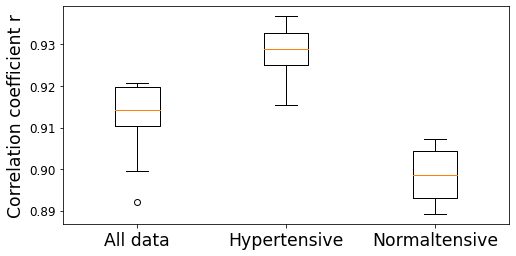

In [54]:
#Plot the boxplots for r
r_values = [r_all, r_hyper, r_normal]
plt.figure(figsize=[8,4])
plt.boxplot(r_values)
plt.xticks([1, 2, 3], ['All data', 'Hypertensive', 'Normotensive'], fontsize='xx-large')
plt.yticks(fontsize='large')
plt.ylabel('Correlation coefficient r', fontsize='xx-large')
plt.savefig()

Text(0, 0.5, 'Score R2')

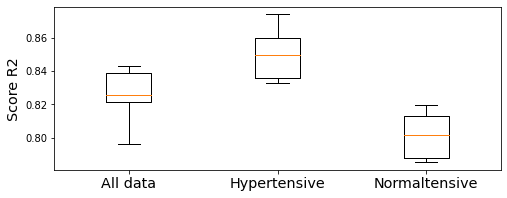

In [55]:
#Plot the boxplots for R2
R2_values = [R2_all, R2_hyper, R2_normal]
plt.figure(figsize=[8,3])
plt.boxplot(R2_values)
plt.xticks([1, 2, 3], ['All data', 'Hypertensive', 'Normotensive'], fontsize='x-large')
plt.ylabel('Score R2', fontsize='x-large')
plt.savefig()